In [1]:
class Geom:
    pass


class Line(Geom):
    def draw(self):
        print("Рисование линии")

Если у нас имеется некий базовый класс Geom и мы создаем дочерний класс Line, в котором дополнительно прописан метод draw, то это называется расширением базового класса.

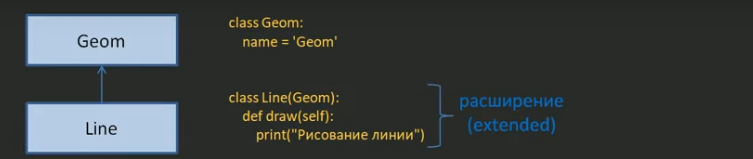

Если же в классе Geom мы также пропишем метод draw, то мы получим переопределение базового класса.

In [2]:
class Geom:
    
    def draw(self):
        print("Рисование")


class Line(Geom):
    
    def draw(self):
        print("Рисование линии")

In [4]:
class Geom:
    
    def __init__(self):
        print("Инициализация Geom")


class Line(Geom):
    def draw(self):
        print("Рисование линии")

In [6]:
l = Line()

Инициализация Geom


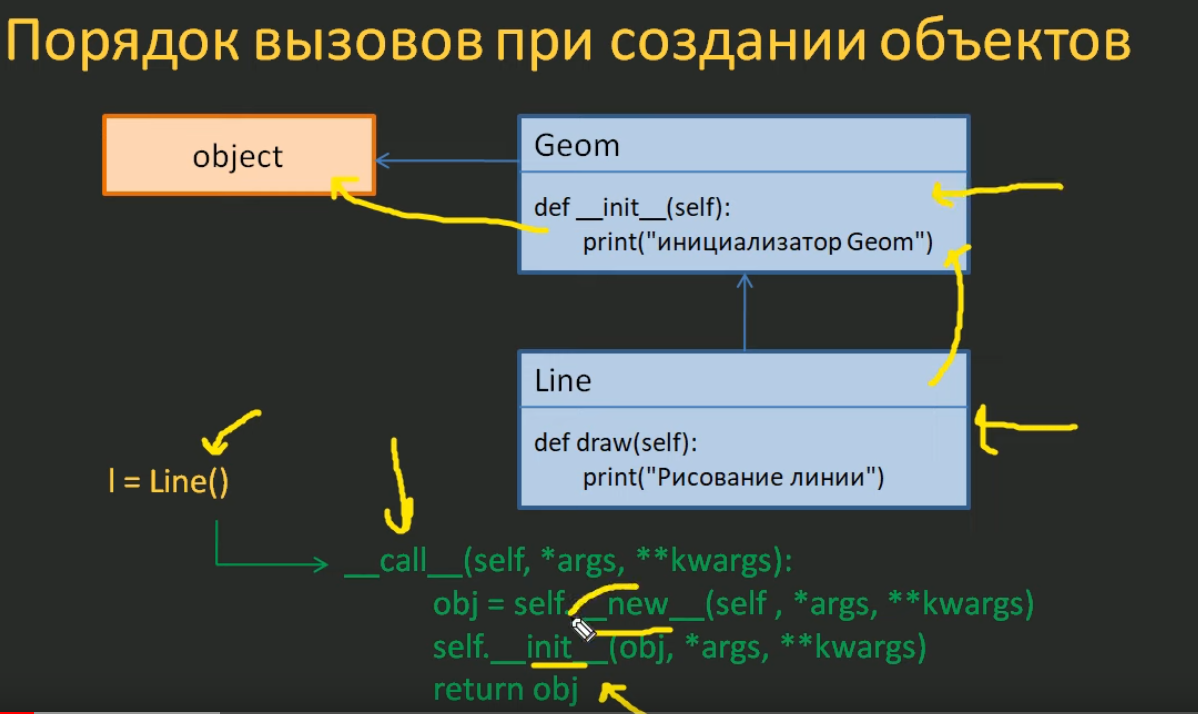

*метода __ call __ берётся из метакласса*

Определим инициализатор в классе Line.

In [7]:
class Geom:
    
    def __init__(self):
        print("Инициализация Geom")


class Line(Geom):
    
    def __init__(self):
        print("Инициализация Line")
    
    def draw(self):
        print("Рисование линии")

In [8]:
l = Line()

Инициализация Line


In [9]:
class Geom:
    
    def __init__(self):
        print("Инициализация Geom")


class Line(Geom):
    
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        print("Инициализация Line")
    
    def draw(self):
        print("Рисование линии")

In [11]:
l = Line(0, 1, 10, 20)

Инициализация Line


In [12]:
l.__dict__

{'x1': 0, 'y1': 1, 'x2': 10, 'y2': 20}

Добавим ещё один дочерний класс

In [13]:
class Geom:
    
    def __init__(self):
        print("Инициализация Geom")


class Line(Geom):
    
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
    
    def draw(self):
        print("Рисование линии")
        
        
class Rect(Geom):
    
    def __init__(self, x1, y1, x2, y2, fill=None):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.fill = fill
    
    def draw(self):
        print("Рисование прямоугольника")

Мы можем видеть, что у нас снова происходит дублирование кода, а значит общее этих методов нужно вынести в базовый класс Geom.

In [16]:
class Geom:
    
    def __init__(self, x1, y1, x2, y2):
        print(f"Инициализатор Geom для {self.__class__}")
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
    


class Line(Geom):
    
    def draw(self):
        print("Рисование линии")
        
        
class Rect(Geom):
    
    def __init__(self, x1, y1, x2, y2, fill=None):
        print("Инициализатор Rect")
        self.fill = fill
    
    def draw(self):
        print("Рисование прямоугольника")

In [17]:
l = Line(0, 1, 10, 20)
r = Rect(1, 2, 3, 4)

Инициализатор Geom для <class '__main__.Line'>
Инициализатор Rect


Как видно для объекта класса Rect вызывается свой инициализатор и понятно почему.


Чтобы запустить инициализатор базового класса мы можем вызвать его напрямую в инициализаторе Rect

In [18]:
class Geom:
    
    def __init__(self, x1, y1, x2, y2):
        print(f"Инициализатор Geom для {self.__class__}")
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
    


class Line(Geom):
    
    def draw(self):
        print("Рисование линии")
        
        
class Rect(Geom):
    
    def __init__(self, x1, y1, x2, y2, fill=None):
        Geom.__init__(self, x1, y1, x2, y2)
        print("Инициализатор Rect")
        self.fill = fill
    
    def draw(self):
        print("Рисование прямоугольника")
        
        
r = Rect(0, 1, 10, 20)

Инициализатор Geom для <class '__main__.Rect'>
Инициализатор Rect


Однако явно указывать базовый класс неправильно, так как имена базовых классов и сама иерархия наследования может меняться.

Для этого(обращению к базовому классу) используется функция super(), которая возвращает ссылку на объект посредник, через который происходит вызов методов базового класса.

In [19]:
class Geom:
    
    def __init__(self, x1, y1, x2, y2):
        print(f"Инициализатор Geom для {self.__class__}")
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
    


class Line(Geom):
    
    def draw(self):
        print("Рисование линии")
        
        
class Rect(Geom):
    
    def __init__(self, x1, y1, x2, y2, fill=None):
        super().__init__(x1, y1, x2, y2)
        print("Инициализатор Rect")
        self.fill = fill
    
    def draw(self):
        print("Рисование прямоугольника")
        
        
r = Rect(0, 1, 10, 20)

Инициализатор Geom для <class '__main__.Rect'>
Инициализатор Rect


super() возвращает нам объект, через который мы уже вызываем метод __ init __

In [20]:
r.__dict__

{'x1': 0, 'y1': 1, 'x2': 10, 'y2': 20, 'fill': None}

Делегирование...

https://www.youtube.com/watch?v=cvryJ9LDpa8